### Attendance Improvement Recomendations for the MLB Association

Thank you for the opportunity to review this season’s attendance data. From what I understood from your request, you are looking for supporting data that will help the organization make driving decisions on ways to increase game attendance. While analyzing the data I found some interesting correlations to attendance, and a few that you are probably more familiar with.

To give you some context, we imported the data provided by the MLB into a few models to help us visualize some trends and provide a more palatable representation of our findings. The data spans the normal MLB season and includes attendance tracked by day of the week, opponent, temperature, visibility, time of day, and if the game was commemorated with a bobblehead.

In [31]:
import pandas as pd

# Loading the data into a DataFrame
MLB_Data = pd.read_csv("dodgers-2022.csv")

# Checking the data types
print(MLB_Data.dtypes)

# Convert the "month" and "day_of_week" columns to categorical variables
MLB_Data["month"] = pd.Categorical(MLB_Data["month"], categories=["APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT"], ordered=True)
MLB_Data["day_of_week"] = pd.Categorical(MLB_Data["day_of_week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Preview of the data
MLB_Data.head(10)


month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


The first part of my analysis is to find the categories of data that have the strongest relationship to higher attendance. Right away a clear indication of attendance impact is the weather and temperature. Attendance trends higher the warmer the weather. While the MLB does not have control over the weather, a study of the warmest days may find that the MLB should shift the season schedule.   

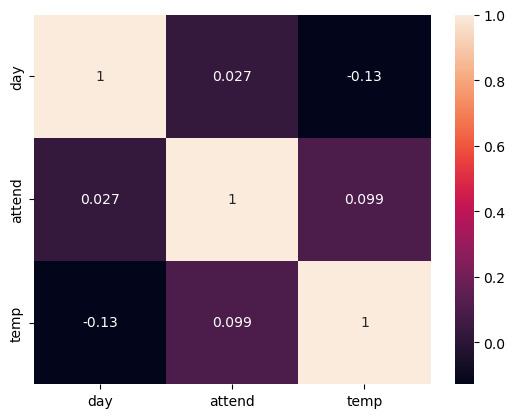

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Correlation matrix
corr_matrix = MLB_Data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Next we observed attendance by opponent, and some clear team favorites surfaced along with the national playoff games. A pattern of lower attendance between these peak games is also evident. The MLB may want to consider or incentive packages that compensates ticket holders depending on the number of seasonal games they attend, including national game privileges, may considerably improve attendance.

<AxesSubplot:xlabel='opponent'>

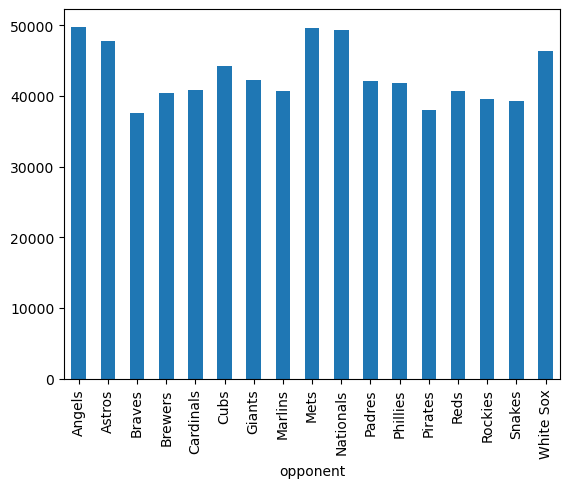

In [17]:
# Create a bar chart of attendance by day of the week
MLB_Data.groupby("day_of_week")["attend"].mean().plot(kind="bar")

# Create a bar chart of attendance by opponent
MLB_Data.groupby("opponent")["attend"].mean().plot(kind="bar")

As indicated in the opening, I observed that attendance increases on days when the temperature is above 80 degrees Fahrenheit but below 95 degrees Fahrenheit. It has also been observed that attendance is highest for games held in the middle of the month.
In addition, I discovered that playing the game during the day rather than at night has the greatest effect on attendance, with Tuesday being the most popular day for games. When the weather is nice, more people tend to show up.

Just incase you are wondering, games with fireworks did not have the highest attendance draw, nor did I find in the data that increasing the number of games with fireworks would have an impact on attendance. 

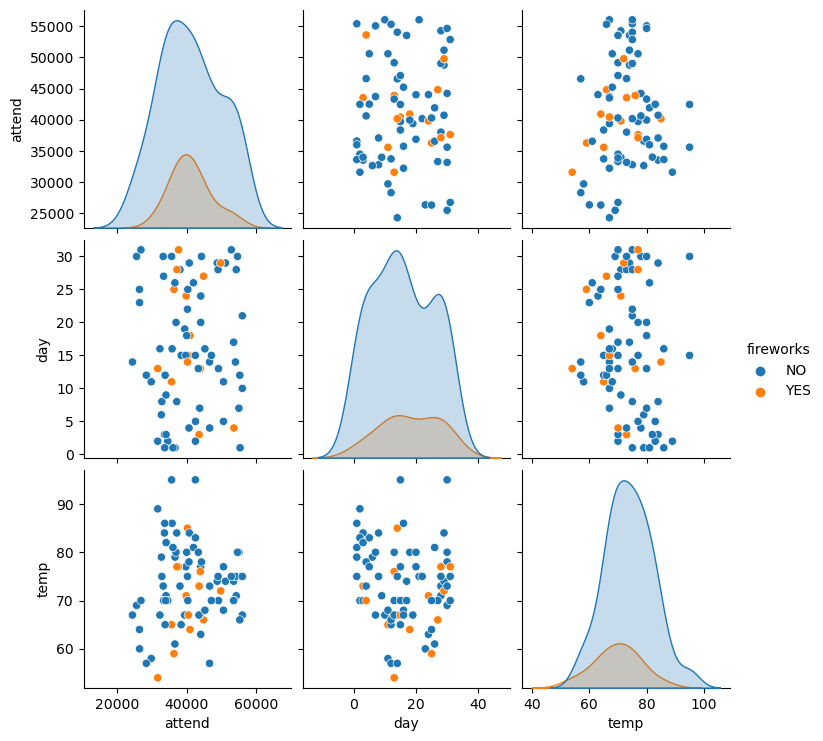

In [8]:
sns.pairplot(MLB_Data, vars=["attend", "day", "temp"], hue="fireworks")
plt.show()

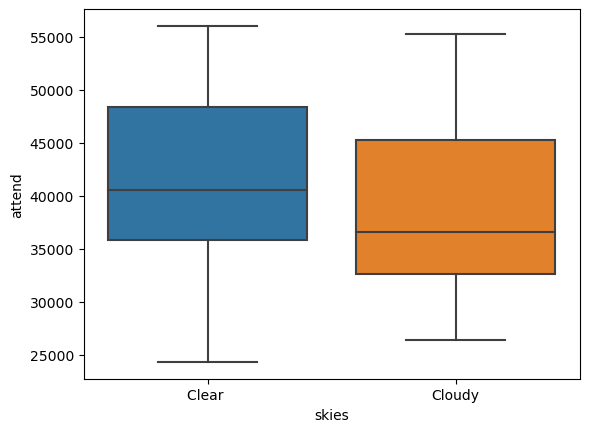

In [11]:
sns.boxplot(x="skies", y="attend", data=MLB_Data)
plt.show()

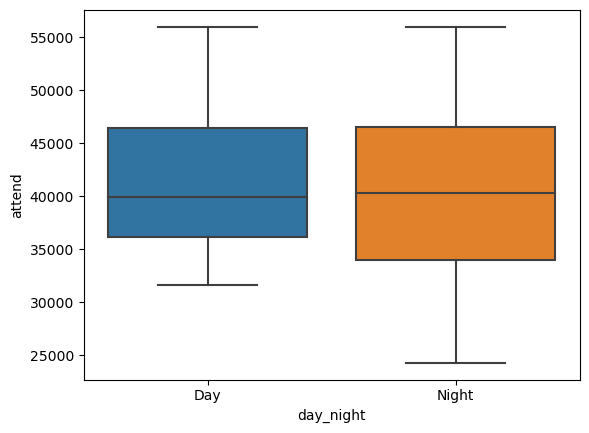

In [12]:
sns.boxplot(x="day_night", y="attend", data=MLB_Data)
plt.show()

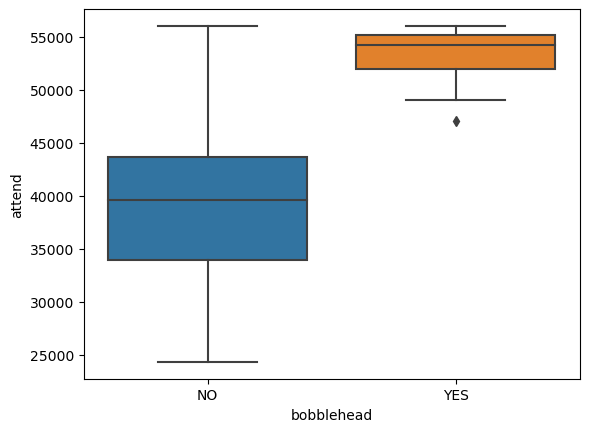

In [16]:
sns.boxplot(x="bobblehead", y="attend", data=MLB_Data)
plt.show()

Admittedly I was a little surprised to find that games played on Tuesday had the highest per game attendance, while games played on Thursday attracted the highest overall attendance for all games.

Antidotally, college age attendees tend to treat Thursday as the beginning of the weekend, and perhaps this may be an underlying narrative. Given that Thursday is already saturated on the game schedule, looking to the second most scheduled day of Tuesday, the MLB may want to continue the momentum by marketing games on that day. 

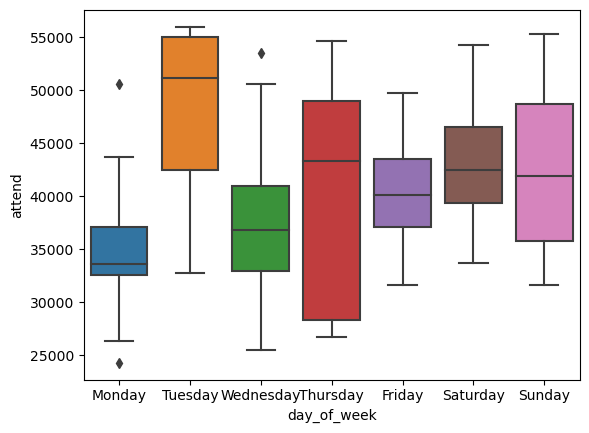

In [9]:
sns.boxplot(x="day_of_week", y="attend", data=MLB_Data)
plt.show()

The Bobblehead promotion is one of the most effective ways to increase game attendance. Bobbleheads are collectible figurines that bobble their heads and often portray a player, coach, or mascot. Collectors and fans alike clamor for these items, which are often distributed to the public on designated game days. Bobblehead giveaways on game days, especially when coupled with additional incentives like good weather or a day game, may greatly boost attendance. The data revealed that the Pirates, Snakes, and the Brewers may benefit from Bobblehead promotions to increase fan loyalty which may generate additional attendance downstream. 

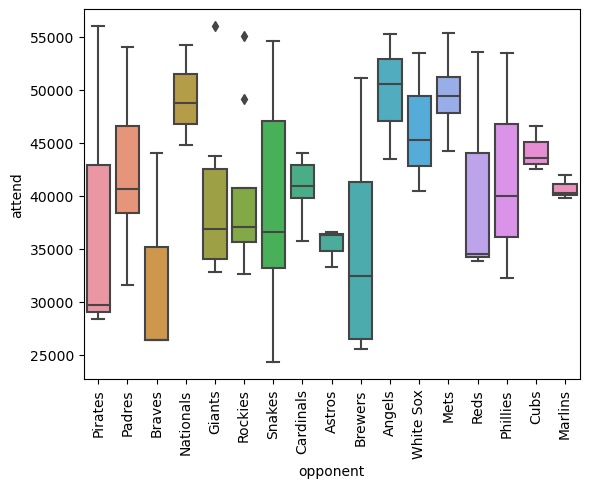

In [10]:
sns.boxplot(x="opponent", y="attend", data=MLB_Data)
plt.xticks(rotation=90)
plt.show()

In summary, the data points to aligning games on clear warm days, considering fan promotions for low attendance days of the week, and commemorating teams with Bobblehead figurines could help fan loyalty and boost attendance. 